In [2]:
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import pandas as pd
import string
import seaborn as sns

In [13]:
df = pd.read_csv("messages.csv")
df.head(5)


,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [15]:
df.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
df.groupby('label').describe()

subject                               message         \
        count unique               top freq   count unique   
label                                                        
0        2363   2193  sociolinguistics    8    2412   2401   
1         468    420              re :    7     481    458   

                                                               
                                                     top freq  
label                                                          
0      lsrl 29 second call for papers the xxix lingui...    2  
1      this is not spam ; you are receiving this mess...    5

In [6]:
df["Length"]=df["message"].apply(len)

In [7]:
df.head(5)

,subject,message,label,Length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


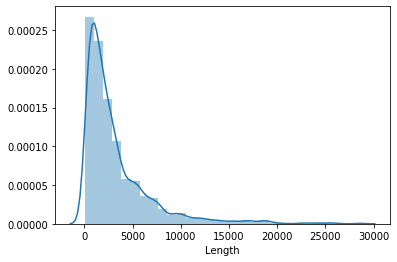

In [8]:
sns.distplot(df["Length"],bins=30)

In [9]:
df["Length"].max()

28649

In [10]:
df[df["Length"]==910]["message"].iloc[0]

'in agreement with some of the comments posted about " of " in " coulda " ( and let \'s include hadda ) etc . , it is interesting to me that so many readers knowledgeable about linguistics see any more than a graphic convention attempting to represent the homophony of \' ve with " of " here . it leads to interesting questions about how spelling affects our " mental " lexical representations of words , as literate beings . however , it is questionable whether whatever " psychological reality " the spelling " of " in " could of " has for the literate will have any effect on the future of the language ( since that was brought up ) . i think the spelling " of " for unstressed " have " has about as much chance of making a verb of the other " of " as the spelling " we " would have of making french " oui " an english pronoun . the evolution of parentheses into phonological segments is perhaps more likely .\n'

In [11]:
df[df["Length"] == df["Length"].min()]["message"].iloc[0]

'original query :\n'

In [12]:
df.head(1)

,subject,message,label,Length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856


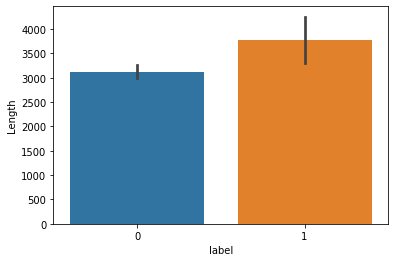

In [13]:
sns.barplot(x='label', y='Length', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A62EC0EC88>,
      dtype=object)

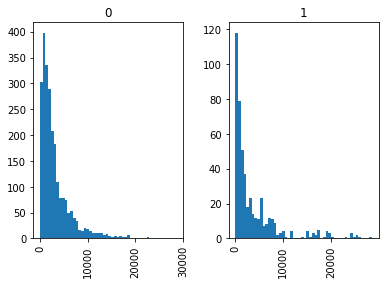

In [14]:

df.hist(column='Length',by='label', bins=50)

In [15]:
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
       
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
       
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
       
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

In [16]:
mess = 'Sample message! Notice: it has punctuation.'
obj = PreProcessText()
words = obj.token_words(mess)
print(words)

['Sample', 'message', 'Notice', 'punctuation']


In [17]:
df["message"].head(4).apply(obj.token_words)

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
Name: message, dtype: object

In [18]:
bow_transformer = CountVectorizer(analyzer=obj.token_words).fit(df["message"])


In [19]:
messages_bow = bow_transformer.transform(df["message"])

In [20]:
print("Shape of sparese matrix {}".format(messages_bow.shape))

Shape of sparese matrix (2893, 64661)


In [22]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [23]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
model = MultinomialNB().fit(messages_tfidf,df["label"])

In [27]:
all_predictions = model.predict(messages_tfidf)
pred = pd.DataFrame(data=all_predictions)

pred.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [28]:
df["label"].head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: label, dtype: int64